In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import drive
# drive.mount('/content/drive')

In [142]:
csv_path_orders = '/content/drive/My Drive/orders.csv'
csv_path_payments = '/content/drive/My Drive/payments.csv'
csv_path_plan = '/content/drive/My Drive/plan.csv'

orders_data = pd.read_csv(csv_path_orders)
payments_data = pd.read_csv(csv_path_payments)
plan_data = pd.read_csv(csv_path_plan)

In [143]:
data = pd.merge(orders_data, payments_data, on='order_id')

In [144]:
data = pd.merge(data, plan_data, on='order_id')

In [145]:
data.set_index('order_id', inplace=True)

In [146]:
data.head()

,created_at,put_at,closed_at,issued_sum,paid_at,paid_sum,plan_at,plan_sum_total
order_id,,,,,,,,
400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-06-02,5600.0
400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-07-02,9450.0
400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-08-01,12170.0
400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-08-31,14890.0
400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0,2022-06-02 20:20:16.790,5600.0,2022-09-30,17610.0


In [147]:
data['plan_at'] = pd.to_datetime(data['plan_at'])
data['paid_at'] = pd.to_datetime(data['paid_at'])

In [149]:
data['is_overdue'] = data['paid_at'] > data['plan_at']

In [150]:
data['week'] = data['plan_at'].dt.to_period('W')
overdue_counts = data.groupby(['week'])['is_overdue'].sum().reset_index()

overdue_counts['is_overdue'] = overdue_counts['is_overdue'] / overdue_counts['is_overdue'].sum() * 100

In [151]:
overdue_counts

,week,is_overdue
0,2022-05-30/2022-06-05,1.013740
1,2022-06-06/2022-06-12,2.570862
2,2022-06-13/2022-06-19,3.341906
3,2022-06-20/2022-06-26,4.152147
4,2022-06-27/2022-07-03,4.804527
5,2022-07-04/2022-07-10,5.314619
6,2022-07-11/2022-07-17,5.828201
7,2022-07-18/2022-07-24,6.018277
8,2022-07-25/2022-07-31,6.421250
9,2022-08-01/2022-08-07,6.866641


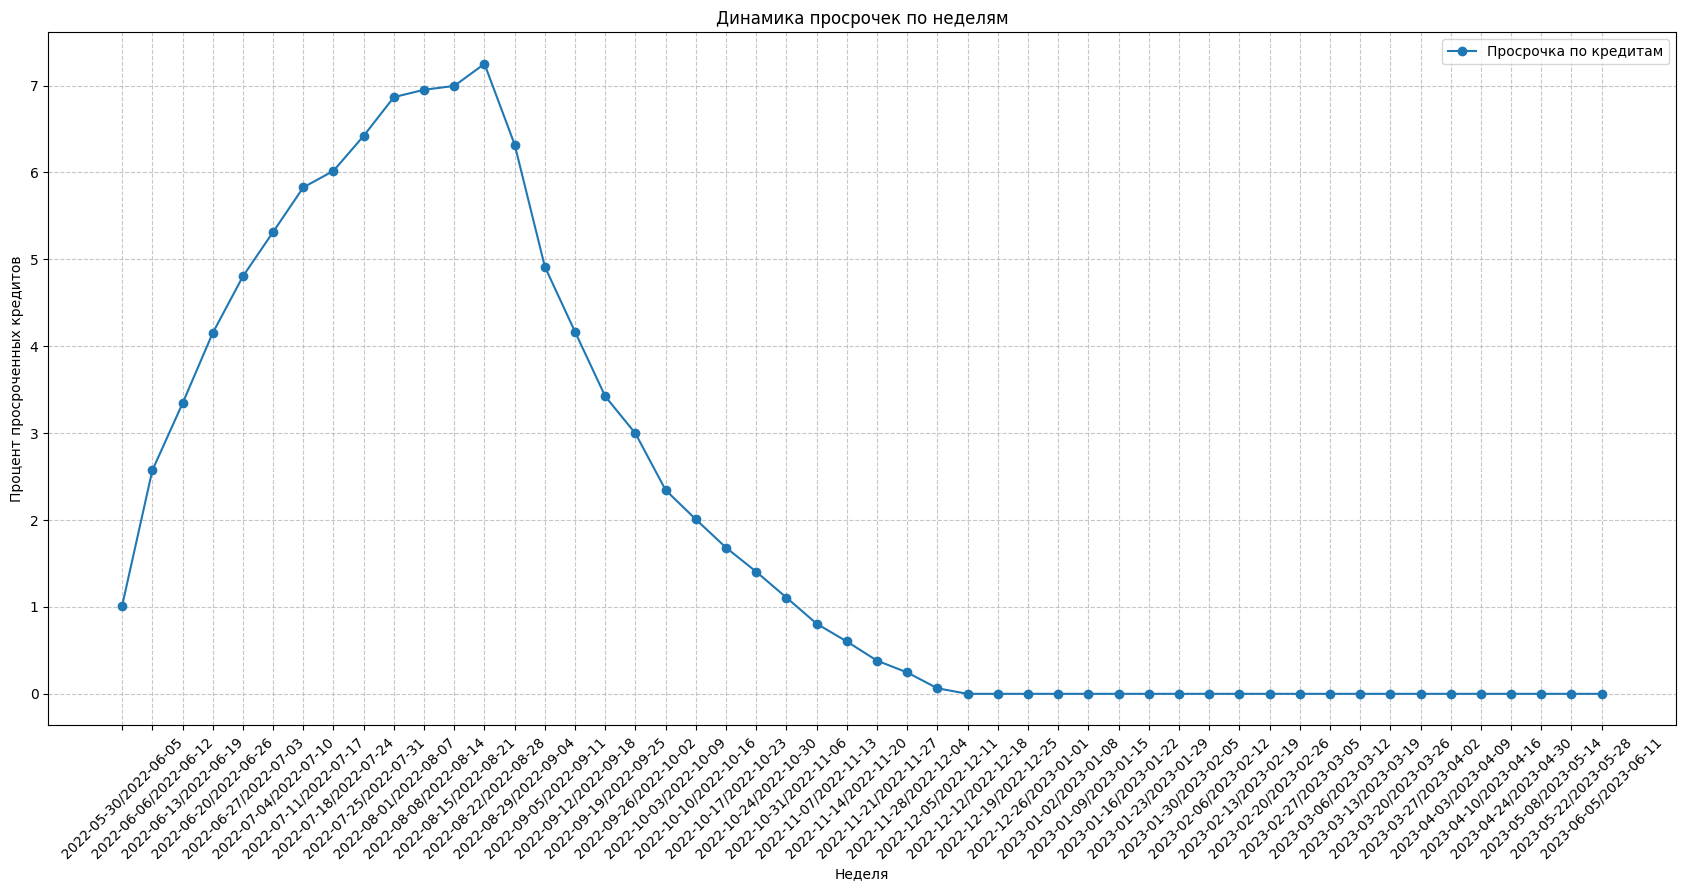

In [152]:
plt.figure(figsize=(21, 9))

plt.plot(overdue_counts['week'].astype(str), overdue_counts['is_overdue'], marker='o')
plt.title('Динамика просрочек по неделям')
plt.xlabel('Неделя')
plt.ylabel('Процент просроченных кредитов')
plt.xticks(rotation=45)
plt.legend(['Просрочка по кредитам'])
plt.grid(linestyle='--', alpha=0.7)
plt.show()